# MODEL COMPLEXITY ANALYSIS

In this notebook we investigate how **model complexity affects the fit of a model**. We know low complexity models produce high bias models which are just too simple; and high complexity models produce high variance models which are too complex and hence overfit. We will see as model complexity increases the model fit becomes to erratic.

**Add the directory of m_learn package to the system path**

In [1]:
from config import append_path
append_path('../../')

**Import necessary packages and modules**  

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from m_learn.utility.data_preprocessing import polynomial_dataFrame
from m_learn.utility.performance_metrics import residual_sum_of_square
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 

## 1. Example demonstration of fit of a model having polynomial features

### 1.1 Load and preprocess the data

**Load the the data**

In [3]:
data = pd.read_csv('./../../data/house_prices/train.csv')

**Split the data into training and test sets**

In [4]:
train_data, test_data = train_test_split(data, test_size = 0.20, random_state = 2)

**Feature and output of the model**

In [5]:
feature = 'GrLivArea'
output = 'SalePrice'

**Extract the output column of the training set which will be needed for later operations**

In [6]:
output_train = train_data[output]

#### Create degree 4 polynomial data

In [7]:
# degree of polynomial data
degree = 4
# create the polynomial data using the training set
polynomial_train = polynomial_dataFrame(train_data[feature], degree)
# inspect the polynomial data
polynomial_train.head(5)

,power1,power2,power3,power4
455,1242,1542564.0,1.915864e+09,2.379504e+12
863,1148,1317904.0,1.512954e+09,1.736871e+12
504,1322,1747684.0,2.310438e+09,3.054399e+12
1413,1844,3400336.0,6.270220e+09,1.156228e+13
1389,1218,1483524.0,1.806932e+09,2.200843e+12


### 1.2 Visualize the model fit

#### Create a sklearn linear regression model and fit it using the polynomial training set

In [8]:
# create an object of the model
model = LinearRegression()
# fit the model using the training set
model.fit(polynomial_train, output_train)

LinearRegression()

#### Feature engineering the polynomial training data to make it suitable for matplotlib plot

In [9]:
# extract the power columns from the dataframe
feature_columns = polynomial_train.columns.values.tolist()
# add the output column to the data
polynomial_train[output] = train_data[output]
# sort the dataframe by degree 1 polynomial so that points in the plot join sequentially
polynomial_train = polynomial_train.sort_values(['power1', output])

**Compute predictions of the polynomial training points**

In [10]:
train_output = model.predict(polynomial_train[feature_columns])

#### A side by side plot of 1) line plot of model fit and 2) scatter plot of true output (Saleprice) vs feature data (GrLivArea)

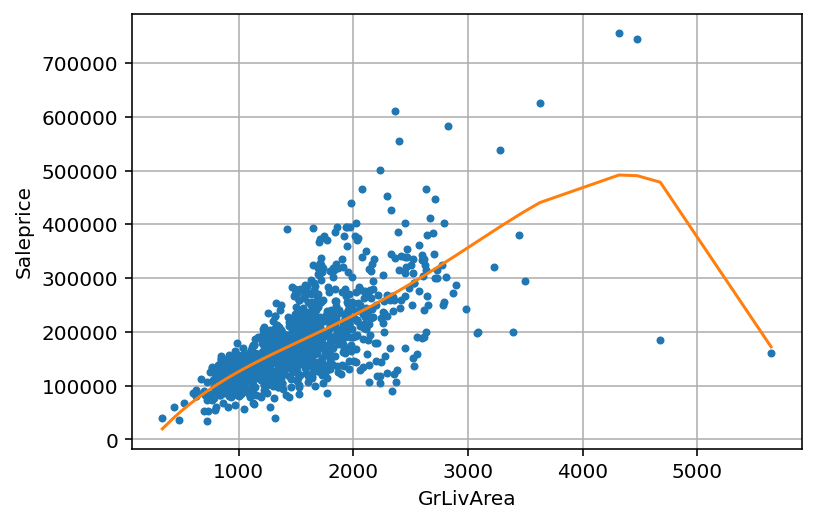

In [11]:
plt.plot(polynomial_train['power1'], polynomial_train[output], '.',
         polynomial_train['power1'], train_output, '-')  
plt.xlabel('GrLivArea')
plt.ylabel('Saleprice') 
plt.grid()
plt.show()

## 2. Investigate how model fit is affected by model complexity

### 2.1 Visualization function that creates subplots of fits of models having a range of model complexities

In [12]:
def polynomial_plot_regression(degrees, regression_model, train_data, test_data,\
                               feature, output, subplot_dimension, **kwargs): 

    '''
    A function which plots fits of models having a range of model complexities
    We basically do the same thing that we did above, but now for models having different complexities
    Arguments:
    degrees - a list that stores the degrees of polynomial data used for analysis
    regression_model - object of sklearn regression model
    train_data - pandas dataframe containing training set
    test_data - pandas dataframe containing validation set
    feature - feature of the model whose polynomial data is wanted
    output - output of the model
    subplot_dimension: a list that contains the dimension of the subplot figure
    kwargs - stores plot information
    Returns:
    RSS - a list that contains cross validation/test RSS of the models having varying complexities
    '''

    # a list to store the test rss of models
    RSS = []

    # extract the output column of the training data
    output_train = train_data[output]

    # iterate through each degree of model complexity
    for degree in degrees:

        ################# Fit regression model using polynomial data of training set #################
        
        # create polynomial data of the given degree complexity
        polynomial_train = polynomial_dataFrame(train_data[feature], degree)
        # fit the model using the training data
        regression_model.fit(polynomial_train, output_train)

        ########################### Compute predictions of training points ###########################
        
        # extract the power columns of the dataframe
        feature_columns = polynomial_train.columns.values.tolist()
        # add the output columnn to the data
        polynomial_train[output] = train_data[output]
        # sort the dataframe by degree 1 polynomial so that points in the plot join sequentially
        polynomial_train = polynomial_train.sort_values(['power1', output])
        # compute predictions of the training points
        train_output = model.predict(polynomial_train[feature_columns])
        
        ################################# Create subplot of model fit #################################
        
        # create a subplot of model fit 
        plt.subplot(subplot_dimension[0], subplot_dimension[1], degree)
        plt.plot(polynomial_train['power1'], polynomial_train[output], '.',
                 polynomial_train['power1'], train_output, '-')
        plt.xlabel(kwargs['xlabel'])
        plt.ylabel(kwargs['ylabel']) 
        plt.grid()        
        plt.title("Degree of model complexity: " + str(degree))
        
        ######################## Compute test RSS and collect the result ########################
        
        # extract the output column of test set
        test_output = test_data[output]
        # create polynomial data for the test set
        polynomial_test = polynomial_dataFrame(test_data[feature], degree)
        # compute predictions of the test points
        predictions = model.predict(polynomial_test)
        # compute test rss using test predictions
        rss = residual_sum_of_square(predictions, test_output)
        # append the test rss to the designated list
        RSS.append(rss)
    
    # adjust height and width space of the subplots
    plt.subplots_adjust(wspace = 0.45, hspace = 0.40)
    # add the grand title to the whole figure
    plt.suptitle("Effect of model complexity on data fit", fontsize = 16)   
    plt.show() 

    # return the list of test RSS of models having varying complexities
    return RSS

### 2.2 Create subplots of fits of models having a range of model complexities

**List of model complexities we want to investigate**

In [13]:
degrees = np.linspace(1,16,num =16,dtype=int)
print("List of model complexities:",degrees)

List of model complexities: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


**Create a linear regression model without fitting**

In [14]:
model = LinearRegression()

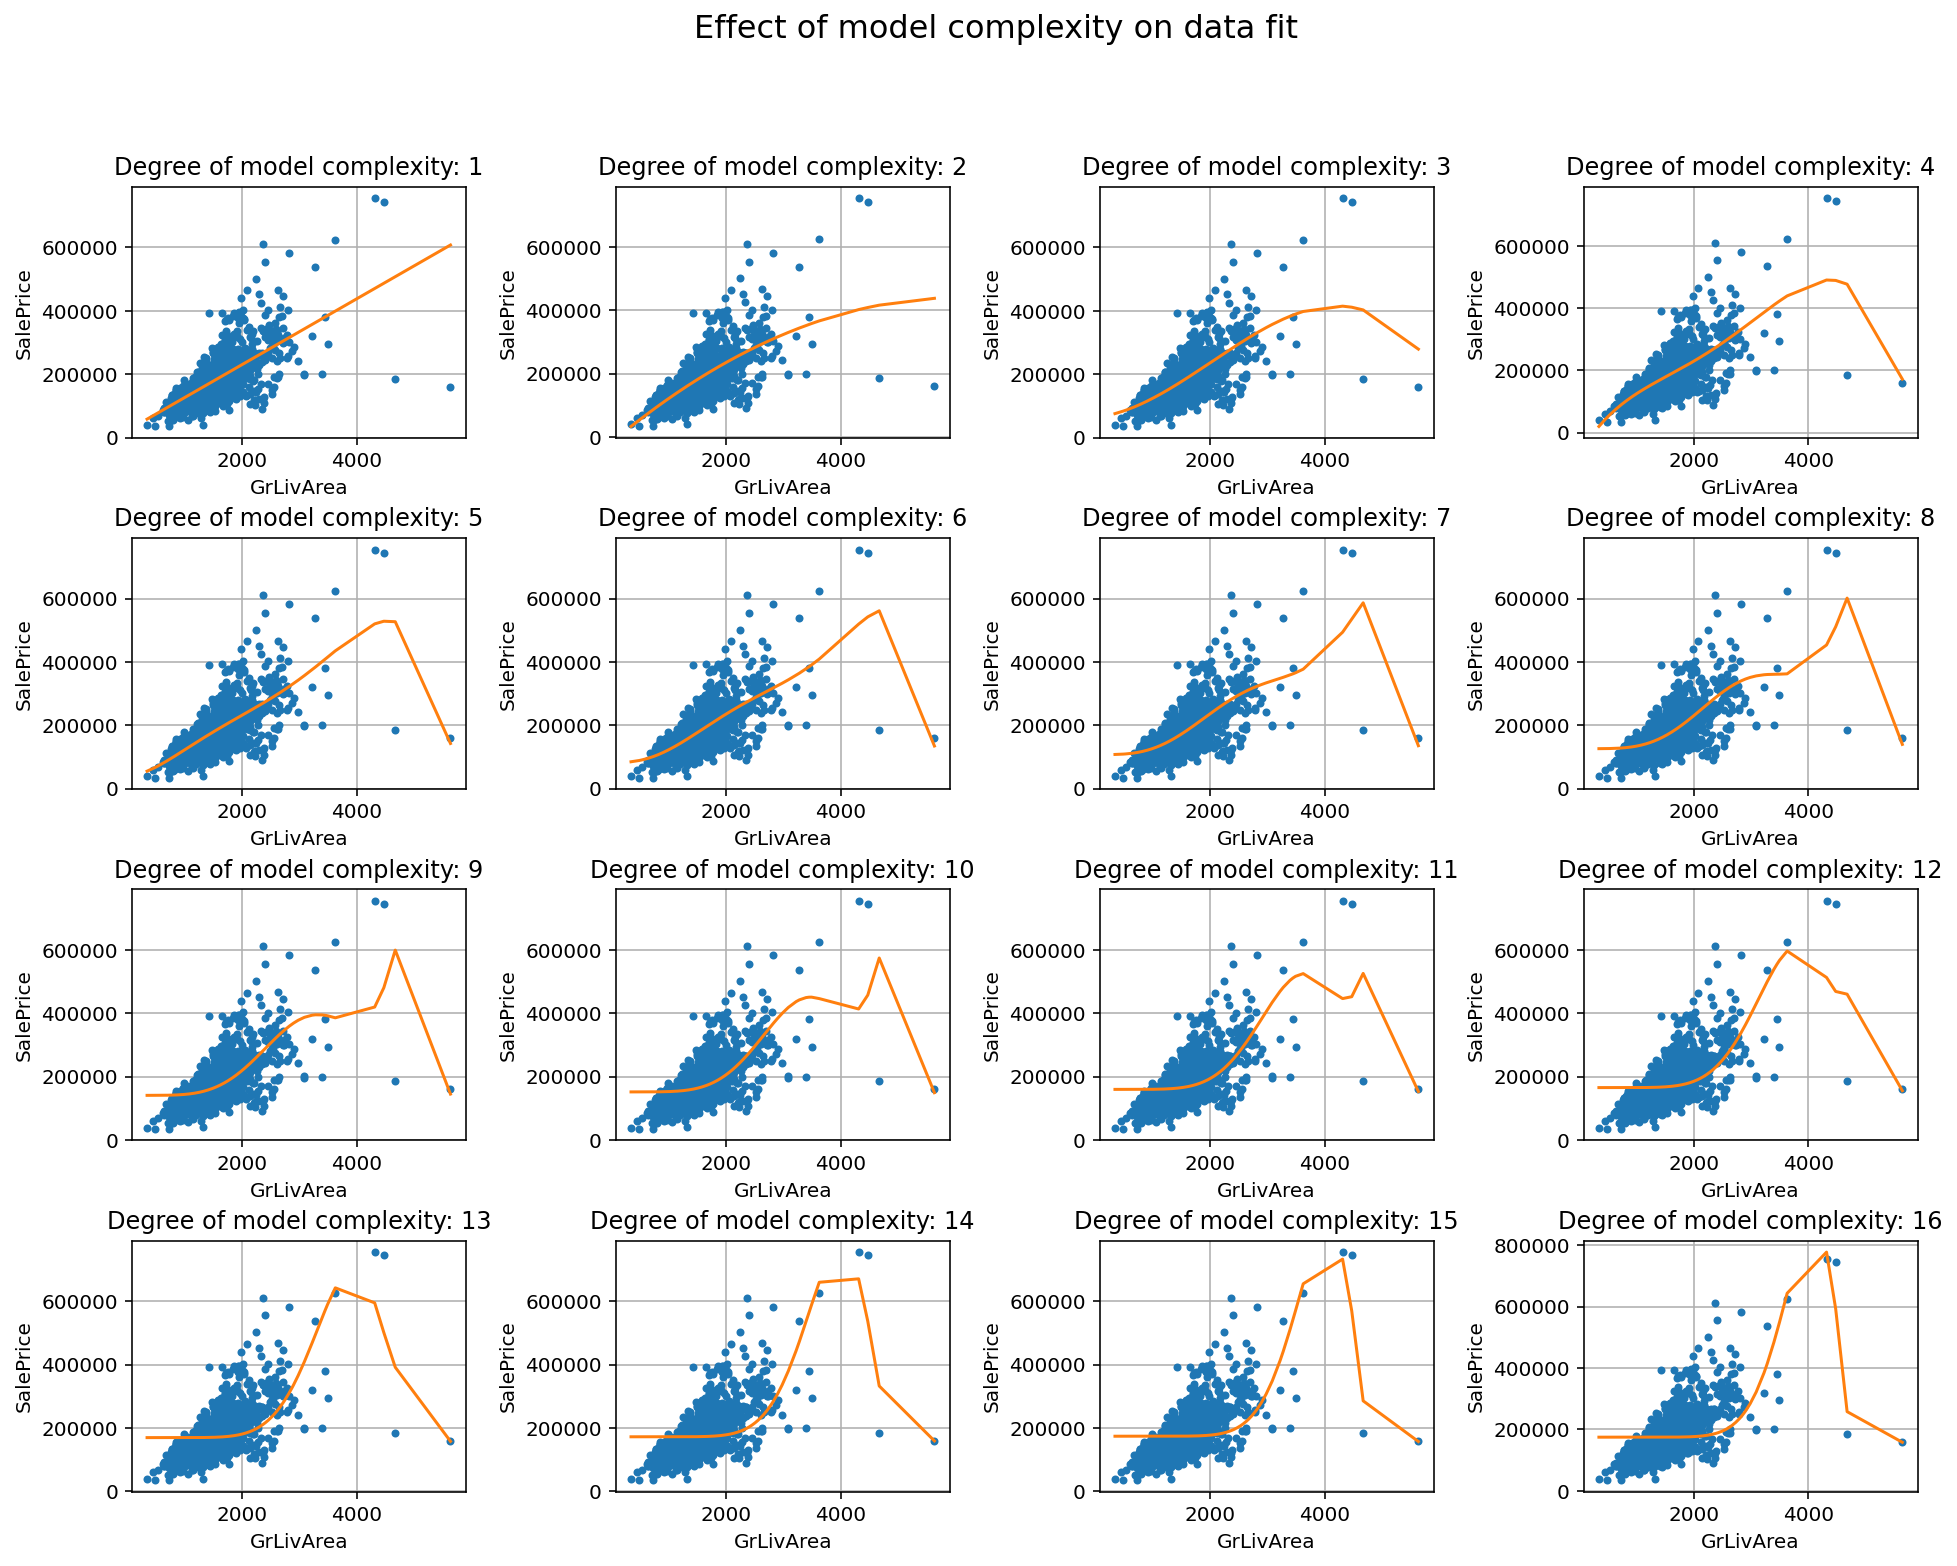

In [15]:
# configure the matplotlib figure size
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
# create the visualization and collect the RSS of models of different complexities
RSS = polynomial_plot_regression(degrees, model, train_data, test_data, feature, output, [4,4],
                                 xlabel = "GrLivArea", ylabel = "SalePrice")

### 2.3 Plot of Cross Validation RSS vs Model Complexity

`What does cross validation error mean?`: One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or test set). Cross validation error is the error calculated on the other subset.

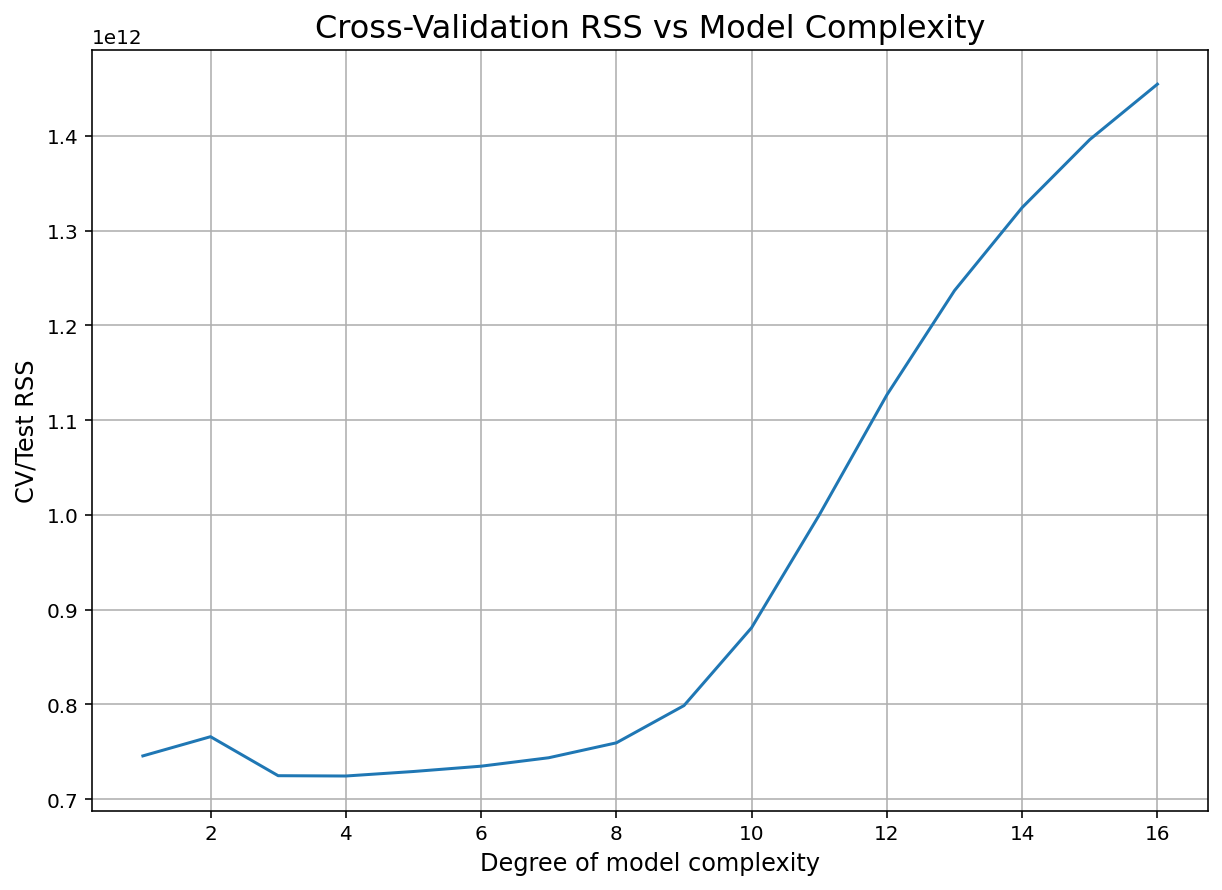

In [16]:
# configure the matplotlib figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 7.0)
# create a table of RSS and model complexity
model_complexity_table = pd.DataFrame({"complexity": degrees, "RSS": RSS})
# plot the curve of cv/test RSS vs model complexity
plt.plot(model_complexity_table["complexity"], model_complexity_table["RSS"])
plt.title("Cross-Validation RSS vs Model Complexity", fontsize = 16)
plt.grid()
plt.xlabel("Degree of model complexity", fontsize = 12)
plt.ylabel("CV/Test RSS",fontsize = 12)
plt.show()